# MATH901 : Recherche opérationnelle

## TP1 Première approche des graphes en Python

Nous allons utiliser une matrice d'adjacence pour représenter un graphe.

In [1]:
# les imports

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

Fonction d'affichage avec la librairie `networkx`. Attention, la librairie note les sommets à partir de 0.

In [2]:
def show(mat, title="", seed=1):
    plt.figure()
    if (mat == mat.T).all():
        G = nx.from_numpy_array(mat)
    else:
        G = nx.from_numpy_array(mat, create_using=nx.DiGraph)
    plt.title(title)
    nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))
    plt.show(block=False)

Matrice orientée

In [3]:
# Orienté         0  1  2  3  4  5  6
mat1 = np.array([[0, 1, 1, 0, 0, 0, 0], # 0
                 [0, 0, 0, 0, 1, 0, 1], # 1
                 [0, 0, 0, 1, 0, 0, 0], # 2
                 [0, 1, 1, 0, 0, 0, 0], # 3
                 [0, 0, 1, 0, 1, 1, 0], # 4
                 [0, 1, 0, 0, 1, 0, 1], # 5
                 [0, 0, 0, 0, 0, 0, 0]])# 6


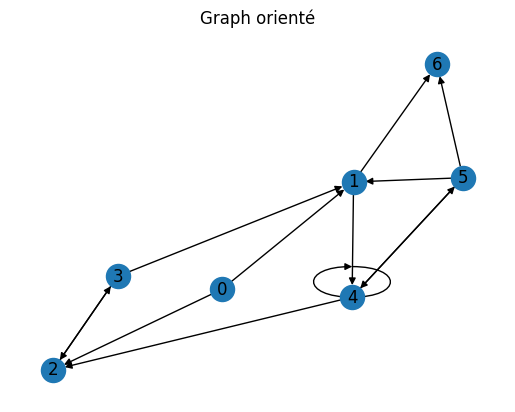

In [4]:
show(mat1, "Graph orienté")

Graph original depuis les consignes

![graph orienté](./images/tp1_oriente.png "Graph orienté")

Matrice non orientée

In [5]:

# Non-orienté     0  1  2  3  4  5  6
mat2 = np.array([[0, 1, 1, 0, 0, 0, 0], # 0
                 [1, 0, 0, 1, 1, 1, 1], # 1
                 [1, 0, 0, 1, 1, 0, 0], # 2
                 [0, 1, 1, 0, 0, 0, 0], # 3
                 [0, 1, 1, 0, 1, 1, 0], # 4
                 [0, 1, 0, 0, 1, 0, 1], # 5
                 [0, 1, 0, 0, 0, 1, 0]])# 6


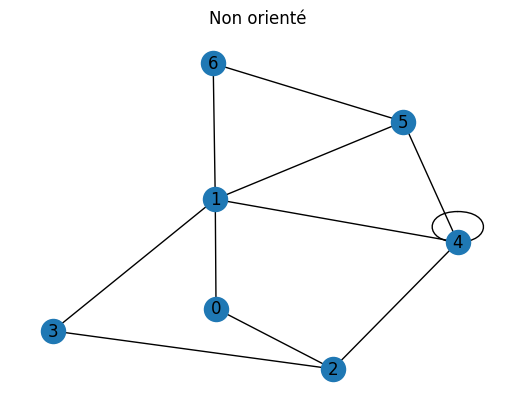

In [6]:
show(mat2, "Non orienté")

Graph original depuis les consignes

![](images/tp1_non_oriente.png)

Calculons maintenant le degré pour un graph non orienté

In [7]:
def deg_non_oriented(mat):
    if not (mat == mat.T).all():
        raise Exception("not a symetric matrix!")
    for n in range(len(mat)):
        print(f"{n} deg={sum(mat[n,:])}")

deg_non_oriented(mat2)

0 deg=2
1 deg=5
2 deg=3
3 deg=2
4 deg=4
5 deg=3
6 deg=2


Et pour un graph orienté les degrés entrants et sortants de chaque noeud

In [8]:
def deg_in(mat, node):
    return sum(mat[:, node])

def deg_out(mat, node):
    return sum(mat[node, :])

def deg_oriented(mat):
    for n in range(len(mat)):
        print(f"{n} deg_out={deg_out(mat, n)} deg_in={deg_in(mat, n)}")

deg_oriented(mat1)

0 deg_out=2 deg_in=0
1 deg_out=2 deg_in=3
2 deg_out=1 deg_in=3
3 deg_out=2 deg_in=1
4 deg_out=3 deg_in=3
5 deg_out=3 deg_in=1
6 deg_out=0 deg_in=2


Voyons maintenant la liste des sommets à distance 2 d'un sommet donné

In [9]:
def dist_from(mat, n, dist):
    # mat = puis(mat, dist)
    mat = np.linalg.matrix_power(mat, dist)
    print(f"from {n=} in {dist} steps:", end=" [ ")
    for i in range(len(mat)):
        if mat[n, i] > 0:
            print(i+1, end=" ")
    print("]")

dist_from(mat1, 0, 2)

from n=0 in 2 steps: [ 4 5 7 ]


In [10]:
def dist_min(mat, dep, arr):
    matO = mat.copy()
    dist = 0
    while mat[dep, arr] == 0:
        dist += 1
        mat = np.matmul(mat, matO)
        if dist > len(mat):
            return -1
    print(f"from {dep} to {arr} in {dist} steps")

dist_min(mat1, 2, 6)

from 2 to 6 in 2 steps


On cherche mainteant à calculer les composantes connexes d'un graph

In [11]:
def nb_composantes_connexes(mat):
    dist = mat.astype(float)
    dist += np.identity(len(mat))  # To avoid just rotating the matrix
    dist = np.linalg.matrix_power(dist, len(mat))  # to get all ateinable nodes
    cc_count = 1  # 1 because we assume the graph is connected in best case
    for i in range(len(mat)):
        if dist[i, cc_count-1] == 0:
            cc_count += 1
    return cc_count

print(f"Nombre de composantes connexes dans le graph orienté: {nb_composantes_connexes(mat1)}")
print(f"Nombre de composantes connexes dans le graph non-orienté: {nb_composantes_connexes(mat2)}")

Nombre de composantes connexes dans le graph orienté: 3
Nombre de composantes connexes dans le graph non-orienté: 1


Maintenant le rang de chaque sommet pour un graph orienté sans cycle :

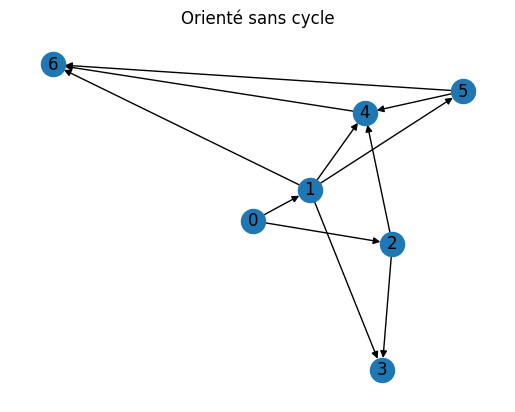

In [12]:
mat3 = np.array([[0, 1, 1, 0, 0, 0, 0], # 0
                 [0, 0, 0, 1, 1, 1, 1], # 1
                 [0, 0, 0, 1, 1, 0, 0], # 2
                 [0, 0, 0, 0, 0, 0, 0], # 3
                 [0, 0, 0, 0, 0, 0, 1], # 4
                 [0, 0, 0, 0, 1, 0, 1], # 5
                 [0, 0, 0, 0, 0, 0, 0]])# 6
show(mat3, "Orienté sans cycle")

rang de k=0 est 0
rang de k=1 est 1
rang de k=2 est 1
rang de k=3 est 2
rang de k=5 est 2
rang de k=4 est 3
rang de k=6 est 4


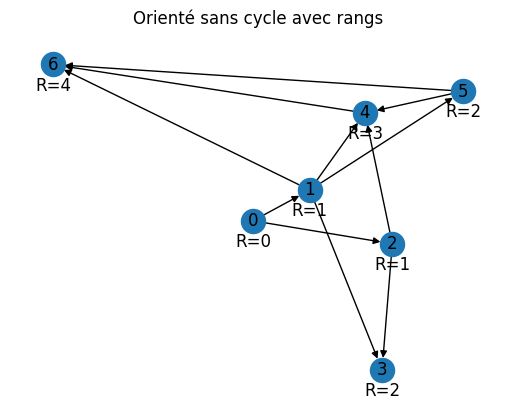

In [13]:
def keep_only(mat, nodes: list[int]):
    mat = mat.copy()
    for i in range(len(mat)):
        if i not in nodes:
            mat[i, :] = 0
            mat[:, i] = 0
    return mat

def is_cyclic(mat):
    mat = mat.copy()
    for i in range(len(mat)):
        mat[i, i] = 0
    return np.linalg.matrix_power(mat, len(mat)).sum() > 0

def rang(mat):
    if is_cyclic(mat):
        raise Exception("Graph is cyclic")

    r = {} # rangs de chaque sommet
    Y = list(range(len(mat))) # noeuds à traiter
    current_rang = 0
    # INIT
    # On enlève les noeuds sans prédecesseurs
    for n in Y:
        if deg_in(mat, n) == 0:
            r[n] = current_rang
            Y.remove(n)

    while len(Y) > 0:
        current_rang += 1
        # On enlève les noeuds sans prédecesseurs
        mat = keep_only(mat, Y)
        for n in Y[:]: # par rapport à l'état actuel de Y
            if deg_in(mat, n) == 0:
                r[n] = current_rang
                Y.remove(n) # même si on le modifie, on ne le traite pas maintenant
    return r

print(*[f"rang de {k=} est {v}" for k, v in rang(mat3).items()], sep="\n")

# affiche le graph avec les rangs
def show_rang(mat, title="", seed=1):
    plt.figure()
    if (mat == mat.T).all():
        G = nx.from_numpy_array(mat)
    else:
        G = nx.from_numpy_array(mat, create_using=nx.DiGraph)
    plt.title(title)
    nx.draw(G, with_labels=True, pos=nx.spring_layout(G, seed=seed))
    r = rang(mat)
    pos = nx.spring_layout(G, seed=seed)
    nx.draw_networkx_labels(G, pos=pos, labels={k: f"\n\nR={v}" for k, v in r.items()})
    plt.show(block=False)

show_rang(mat3, "Orienté sans cycle avec rangs")

## TP2 Dijkstra